## Guided Project: Storytelling Data Visualization on Exchange Rates

It is interesting to note that while in the USA, the strongest days of holiday shopping are Black Friday and Cyber Monday, this is not the case universally. In China, the busiest day is Singles Day in early November, while in many European countries, the busiest day is December 7. Given that a strong holiday season is an important economic indicator, and the exchange rate is very much impacted by economic conditions, we will explore if there are significant fluctuations in the rate surrounding the holiday season.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

exchange_rates.head(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [2]:
exchange_rates.tail(5)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

We will be focusing on the dollar, so we look at its descriptive info. We see that the column name should be corrected to remove the brackets and empty space. Additionally, we will give the ''Period\\Unit:' column a cleaner name.

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
0.8453     1
1.1323     1
1.1192     1
1.0923     1
0.9312     1
Name: US_dollar, Length: 3528, dtype: int64

We see that there are 62 rows with just a '-' as a value. We will drop these in the next frame.

In [6]:
euro_to_dollar = euro_to_dollar.drop(euro_to_dollar.loc[euro_to_dollar['US_dollar'] == '-'].index)

We will also convert the dollar column to float type to facilitate more operations going forwards.

In [7]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [30]:
euro_to_dollar['US_dollar'].describe()

count    5637.000000
mean        1.199704
std         0.162328
min         0.825200
25%         1.098200
50%         1.202300
75%         1.320300
max         1.599000
Name: US_dollar, dtype: float64

In [8]:
rolling_mean = euro_to_dollar['US_dollar'].rolling(30).mean()


Next, we will create columns for day and month. This will allow us to group by day and month over the entire dataset, and thereby get a historic average for every day.

In [41]:
just_day = euro_to_dollar['Time'].dt.day
just_month = euro_to_dollar['Time'].dt.month

In [42]:
euro_to_dollar['just_day'] = just_day
euro_to_dollar['just_month'] = just_month

In [11]:
grouped_df = euro_to_dollar.groupby(['just_month', 'just_day'], as_index = False)['US_dollar'].mean()

In [12]:
nov_dec = grouped_df[(grouped_df['just_month']== 11)|(grouped_df['just_month'] == 12)] 

We then create for segments we will graph- the first and second halves of both November and December. We also note the mean for each segment, which we will use in our graph.

In [43]:
nov_first_half = nov_dec[:16]['US_dollar']

In [44]:
nov_first_half.mean()

1.1955683593750002

In [45]:
nov_second_half = nov_dec[15:31]['US_dollar']

In [46]:
nov_second_half.mean()

1.1956765104166667

In [49]:
dec_first_half = nov_dec[30:46]['US_dollar']

In [50]:
dec_first_half.mean()

1.2039922135416667

In [51]:
dec_second_half = nov_dec[45:61]['US_dollar'] 

In [52]:
dec_second_half.mean()

1.2143480527210884

In [53]:
nov_dec.describe()

,just_month,just_day,US_dollar
count,59.000000,59.000000,59.000000
mean,11.491525,15.423729,1.201694
std,0.504219,8.841913,0.017565
min,11.000000,1.000000,1.175763
25%,11.000000,8.000000,1.186256
50%,11.000000,15.000000,1.201953
75%,12.000000,22.500000,1.212694
max,12.000000,31.000000,1.272229


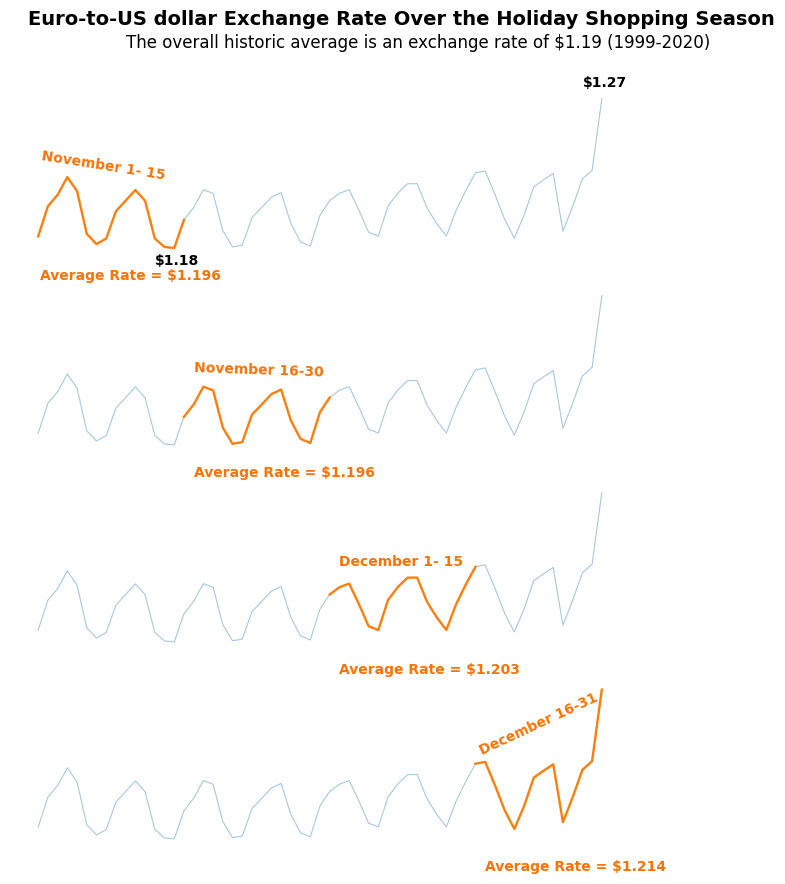

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (8, 10))

axes  = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(range(59), nov_dec['US_dollar'], alpha = .4, linewidth = .8 )
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
count = 0
ax1.plot(range(len(nov_first_half)), nov_first_half,  linewidth = 1.7 )
count += (len(nov_first_half)-1)
ax2.plot(range(count , len(nov_second_half) + count), nov_second_half,  linewidth = 1.7 )
count += len(nov_second_half)-1
ax3.plot(range(count , len(dec_first_half)+ count), dec_first_half,  linewidth = 1.7 )            
count += len(dec_first_half)-1           
ax4.plot(range(count , len(dec_second_half)+ count), dec_second_half,  linewidth = 1.7 ) 

ax1.text(12, 1.165, "$1.18", weight = 'bold')
ax1.text(56, 1.28, '$1.27', weight = 'bold')
ax1.text(.2, 1.22, "November 1- 15", rotation = -9, size  = 10, color  = "#F97306", weight = 'bold')
ax1.text(.2, 1.155, "Average Rate = $1.196", color  = "#F97306", weight = 'bold')
ax1.text(-1, 1.32, 'Euro-to-US dollar Exchange Rate Over the Holiday Shopping Season', weight = 'bold', size = 14)
ax1.text(9, 1.305, "The overall historic average is an exchange rate of $1.19 (1999-2020)", size = 12 )

ax2.text(16, 1.22, "November 16-30" ,rotation = -2, color  = "#F97306", weight = 'bold')
ax2.text(16, 1.155,"Average Rate = $1.196", color  = "#F97306", weight = 'bold') 

ax3.text(31, 1.225, "December 1- 15" , color  = "#F97306", weight = 'bold')
ax3.text(31, 1.155,"Average Rate = $1.203", color  = "#F97306", weight = 'bold' )

ax4.text(45.2, 1.23, 'December 16-31', color  = "#F97306", rotation = 25, weight = 'bold')
ax4.text(46, 1.155,"Average Rate = $1.214", color  = "#F97306", weight = 'bold' )


plt.show()

Overall, it seems that the holiday season does not have a large effect on the exchange rate. The rate remains virtually unchanged in the second period, where Black Friday and Cyber Monday occur, implying that the strenth or weakness of those days has little effect on the exchange rate. There is movement upwards in both the third and fourth periods, implying some aspect of strength in the 
EU's economy in December. It is possible that a strong holiday season around the 7th and going forward contributes to this. It is also possible that unmet expectations in the American holiday sales also contribute. A more detailed study would require doing year by year analysis of the rate against retail data.
As an aside, one very curious finding is the significant spike right at New Year's. This is most probably not correlated to the holiday shopping, but is definitely worthy of further investigation.